# Indian Car Sales Analysis

## Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data

In [2]:
df = pd.read_csv('Car Sell Dataset.csv')

In [3]:
df.head()

,Brand,Model Name,Model Variant,Car Type,Transmission,Fuel Type,Year,Kilometers,Owner,State,Accidental,Price
0,Mahindra,TUV300,AX5,SUV,Manual,CNG,2017,164654,1st,Rajasthan,No,547253
1,Skoda,Rapid,Style,Sedan,Manual,Petrol,2018,41351,1st,Maharashtra,No,512050
2,Maruti Suzuki,Alto,Z,Hatchback,Manual,Diesel,2002,119090,3rd+,Tamil Nadu,No,678923
3,Hyundai,Grand i10,Magna,Hatchback,Manual,Diesel,2013,19979,1st,Andhra Pradesh,No,522500
4,Mahindra,XUV500,W8,SUV,Manual,Petrol,2011,130591,3rd+,Bihar,No,401182


## Size of Data

In [4]:
f"Size of the Data is {df.shape}"

'Size of the Data is (140904, 12)'

## Missing Values

In [5]:
df.isnull().sum()

Brand            0
Model Name       0
Model Variant    0
Car Type         0
Transmission     0
Fuel Type        0
Year             0
Kilometers       0
Owner            0
State            0
Accidental       0
Price            0
dtype: int64

##### Observation : This Data has no missing Values

## Data Types

In [6]:
df.dtypes

Brand            object
Model Name       object
Model Variant    object
Car Type         object
Transmission     object
Fuel Type        object
Year              int64
Kilometers        int64
Owner            object
State            object
Accidental       object
Price             int64
dtype: object

## Duplicates Values

In [7]:
df.duplicated().sum()

np.int64(0)

##### Observation : This Data has no duplicate Values

## General Data Exploration

### Unique Brands & Model Names

In [8]:
df.groupby('Brand')['Model Name'].unique()

Brand
Audi                                          [A6, Q7, A4, Q5, Q3]
BMW                                   [5 Series, X3, 3 Series, X1]
Chevrolet                       [Tavera, Beat, Cruze, Sail, Spark]
Ford                           [Aspire, Figo, EcoSport, Endeavour]
Honda                              [City, Jazz, Brio, WR-V, Amaze]
Hyundai           [Grand i10, Verna, Venue, Aura, Creta, i20, i10]
Jaguar                                            [XE, F-Pace, XF]
Kia                                        [Sonet, Seltos, Carens]
MG                                          [Hector, ZS EV, Astor]
Mahindra                   [TUV300, XUV500, Bolero, Thar, Scorpio]
Maruti Suzuki    [Alto, Dzire, Baleno, Ignis, Swift, Ertiga, Ce...
Nissan                            [Terrano, Sunny, Micra, Magnite]
Range Rover                [Evoque, Velar, Discovery Sport, Sport]
Renault                              [Kwid, Kiger, Triber, Duster]
Skoda                     [Rapid, Superb, Slavia, Kushaq

### Distribution of Car Type

In [9]:
Dist_of_Car_Type = df['Car Type'].value_counts().reset_index()
Dist_of_Car_Type

,Car Type,count
0,Hatchback,55890
1,Sedan,36897
2,SUV,35057
3,MPV,9702
4,Luxury,3358


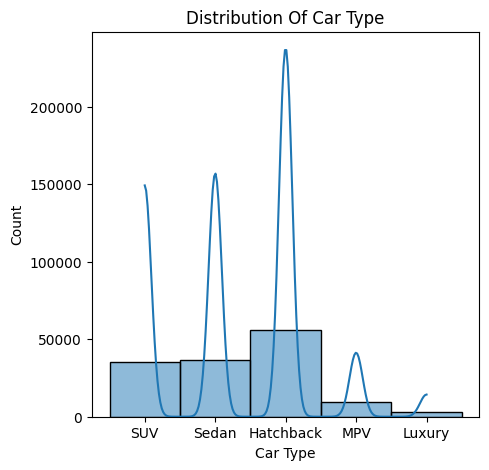

In [10]:
plt.figure(figsize = (5,5))
sns.histplot(df['Car Type'], kde = True)
plt.title("Distribution Of Car Type")
plt.show()

### Distribution of Transmission Type

In [11]:
Dist_of_Transmission = df['Transmission'].value_counts().reset_index()
Dist_of_Transmission

,Transmission,count
0,Manual,119793
1,Automatic,21111


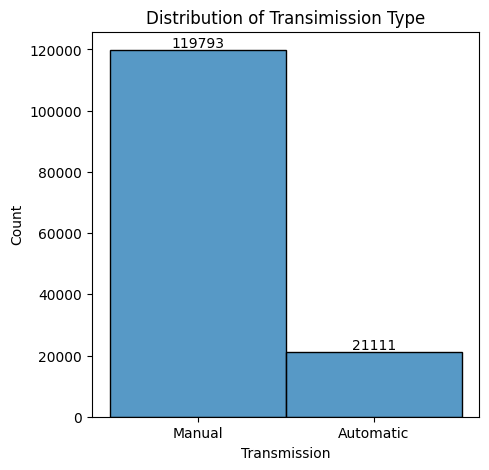

In [12]:
plt.figure(figsize = (5,5))
ax = sns.histplot(df['Transmission'])
plt.title("Distribution of Transimission Type")
plt.bar_label(ax.containers[0])
plt.show()

### Cars Listed per Each Fuel Type

In [13]:
No_of_cars_by_fuel_type=df.groupby('Fuel Type')['Car Type'].count().reset_index().rename(columns = {"Car Type":"Counts of Cars"})
No_of_cars_by_fuel_type

,Fuel Type,Counts of Cars
0,CNG,14054
1,Diesel,42038
2,Electric,2853
3,Hybrid,2772
4,Petrol,79187


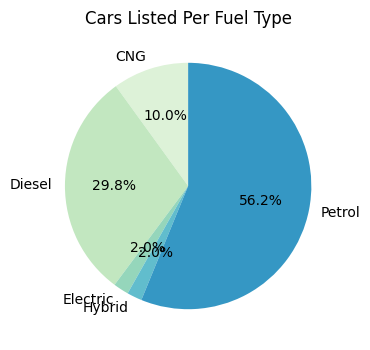

In [14]:
plt.figure(figsize = (5,4))
sns.set_palette("GnBu")
plt.pie(No_of_cars_by_fuel_type['Counts of Cars'], labels = No_of_cars_by_fuel_type['Fuel Type'], startangle = 90, autopct = "%1.1f%%")
plt.title("Cars Listed Per Fuel Type")
plt.show()

#### Observaton:
From Total car Listings Petrol Cars is almost 56.2%.

### Top 5 States With Highest Car Listings

In [15]:
States_with_no_of_cars_listings = df.groupby('State')['Car Type'].count().sort_values(ascending=False).reset_index().rename(columns = {'Car Type': 'Nos. of Cars Listed'})
Top_5_states=States_with_no_of_cars_listings.head()
Top_5_states

,State,Nos. of Cars Listed
0,Maharashtra,24613
1,Delhi,21518
2,Karnataka,18981
3,Tamil Nadu,13678
4,Gujarat,12389


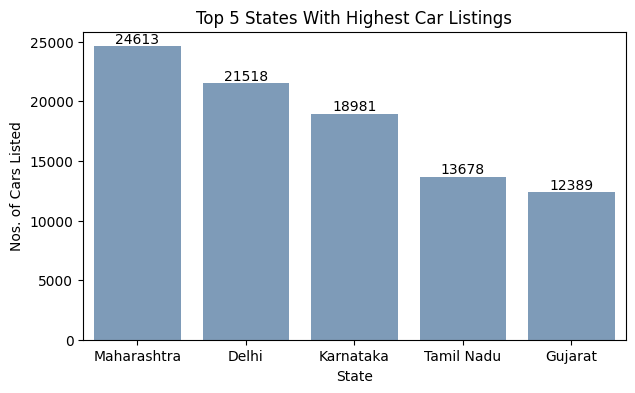

In [16]:
plt.figure(figsize = (7,4))
ax = sns.barplot(x = Top_5_states['State'], y = Top_5_states['Nos. of Cars Listed'], color = '#749BC2')
ax.bar_label(ax.containers[0])
plt.title("Top 5 States With Highest Car Listings")
plt.show()

#### Observaton:
Maharashtra has Highest Car Listings compared to other states

### Nos. of Cars With Accidental incidents

In [17]:
Nos_of_cars_with_accidents = df.groupby('Accidental')['Car Type'].count().reset_index().rename(columns = {'Car Type' : 'Nos of cars'})

accident_count = Nos_of_cars_with_accidents.loc[Nos_of_cars_with_accidents['Accidental'] == 'Yes', 'Nos of cars'].values[0]

f"Nos of cars with accidents is {accident_count}"

'Nos of cars with accidents is 11265'

## Price Analysis

### Average Price based on Brand

In [18]:
Price_by_Brand = df.groupby('Brand')['Price'].mean().sort_values(ascending = False).reset_index()
Price_by_Brand

,Brand,Price
0,MG,1.024061e+06
1,Kia,1.002335e+06
2,Tata,9.023049e+05
3,Renault,8.849282e+05
4,Range Rover,8.456351e+05
5,Jaguar,7.915833e+05
6,Toyota,7.905693e+05
7,Skoda,7.740658e+05
8,Hyundai,7.629213e+05
9,Audi,7.621487e+05


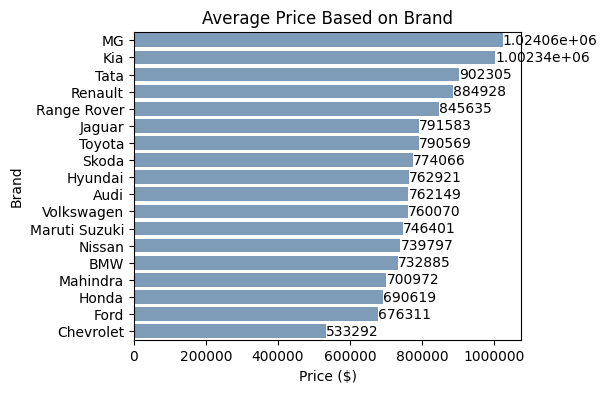

In [19]:
plt.figure(figsize = (5,4))
ax = sns.barplot(x = Price_by_Brand['Price'], y = Price_by_Brand['Brand'], color = '#749BC2')
ax.bar_label(ax.containers[0])
plt.xlabel('Price ($)')
plt.title('Average Price Based on Brand')
plt.ticklabel_format(style = 'plain', axis = 'x')
plt.show()

#### Observation :
MG, Kia, Tata & Renault has more price compared to other car brands

### Price Vs year of manufacturing

C:\Users\vtc\AppData\Local\Temp\ipykernel_716\3222874235.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax_bar = sns.boxplot(x = 'Year', y = 'Price', data = recent_year, palette='GnBu')


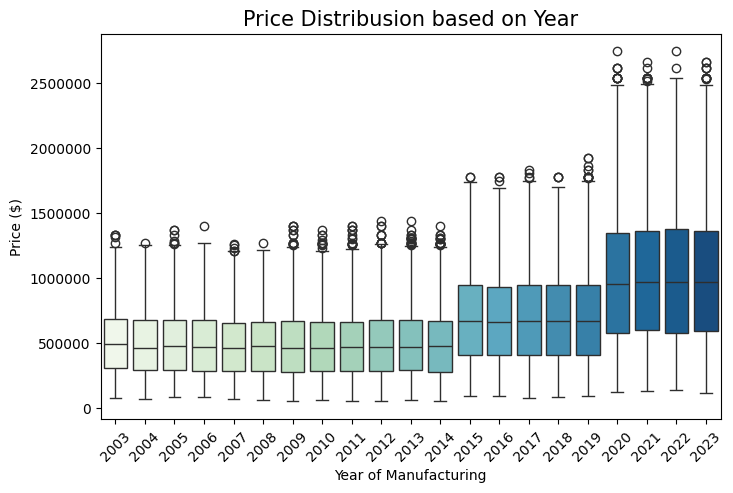

In [20]:
recent_year = df[df['Year'] >= df['Year'].max() - 20]
plt.figure(figsize=(8,5))
ax_bar = sns.boxplot(x = 'Year', y = 'Price', data = recent_year, palette='GnBu')
plt.title('Price Distribusion based on Year', fontsize = 15)
plt.xlabel('Year of Manufacturing', fontsize = 10)
plt.ylabel('Price ($)', fontsize = 10)
plt.xticks(rotation = 45)
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.show()

### Car Price Vs Kilometer Dirven

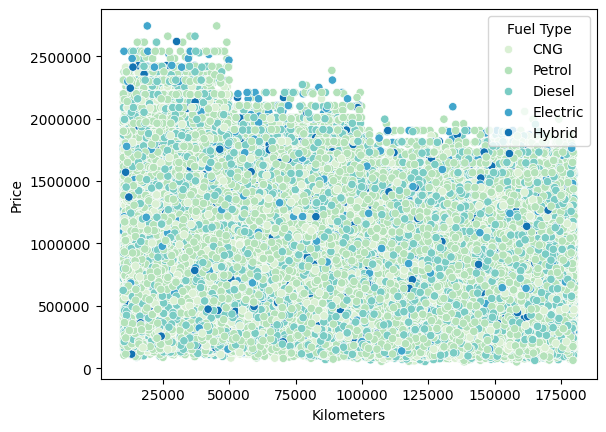

In [21]:
sns.scatterplot(x = df['Kilometers'], y = df['Price'], hue = df['Fuel Type'],  palette = 'GnBu')
plt.ticklabel_format(style = 'plain', axis = 'y')

#### Observation : 
As car is driven more the price of car is less

### Average Price by Fuel Type & Transmission Type

In [22]:
Summary = df.groupby(['Fuel Type', 'Transmission'])['Price'].mean().reset_index()
Summary

,Fuel Type,Transmission,Price
0,CNG,Automatic,774384.314957
1,CNG,Manual,714289.249499
2,Diesel,Automatic,819664.907130
3,Diesel,Manual,751407.605359
4,Electric,Automatic,903754.705742
5,Electric,Manual,829116.708008
6,Hybrid,Automatic,846460.368932
7,Hybrid,Manual,794026.888983
8,Petrol,Automatic,830379.117343
9,Petrol,Manual,752833.994985


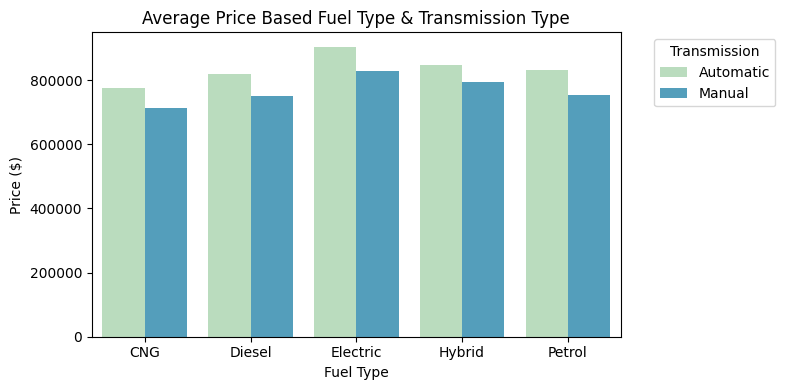

In [23]:
plt.figure(figsize = (8,4))
sns.barplot(x ='Fuel Type', y = 'Price', hue = 'Transmission', data = Summary,  palette = 'GnBu')
plt.ylabel('Price ($)')
plt.title('Average Price Based Fuel Type & Transmission Type')
plt.legend(title='Transmission', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.ticklabel_format(style = 'plain', axis = 'y')
plt.tight_layout()
plt.show()

#### Observation : 
Electric Vehicle have hieghest Average price in both Automatic & Manual Trnsmission type

### Average Price of Car Based on Owner Type

In [24]:
Price_based_on_owner_Type = df.groupby('Owner')['Price'].mean().reset_index()
Price_based_on_owner_Type

,Owner,Price
0,1st,878378.876559
1,2nd,665938.249345
2,3rd+,385554.501280


C:\Users\vtc\AppData\Local\Temp\ipykernel_716\3298715510.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Owner', y = 'Price', data = Price_based_on_owner_Type ,  palette = 'GnBu')


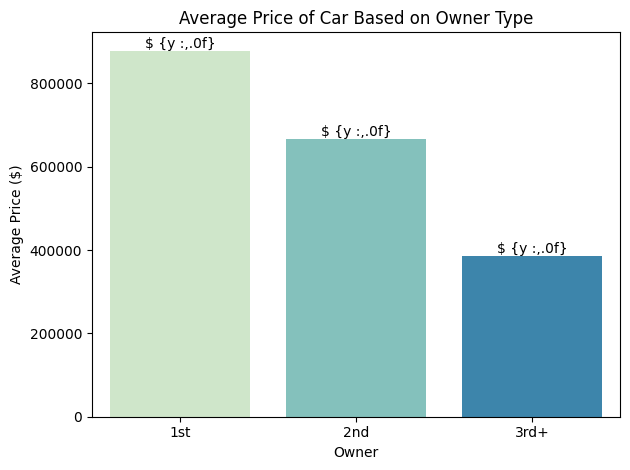

In [25]:
sns.barplot(x = 'Owner', y = 'Price', data = Price_based_on_owner_Type ,  palette = 'GnBu')
for x,y in zip(Price_based_on_owner_Type['Owner'],Price_based_on_owner_Type['Price']):
    plt.text(x,y,'$ {y :,.0f}', ha = 'center', va = 'bottom')
plt.title('Average Price of Car Based on Owner Type')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

#### Observation : 
Average Price of new Car (1st owner) is $ 878,379

### Average Car Price : Accidental Cars Vs. Non-Accidental Cars

In [26]:
Avg_price = df.groupby('Accidental')['Price'].mean().sort_values(ascending = True).reset_index()
Avg_price

,Accidental,Price
0,Yes,541556.469596
1,No,780924.153357


C:\Users\vtc\AppData\Local\Temp\ipykernel_716\40996232.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Accidental', y = 'Price', data = Avg_price,  palette = 'GnBu')


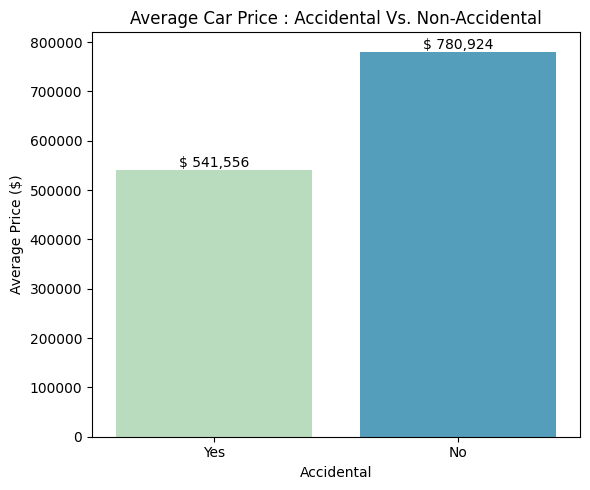

In [27]:
plt.figure(figsize = (6,5))
sns.barplot(x = 'Accidental', y = 'Price', data = Avg_price,  palette = 'GnBu')
plt.title('Average Car Price : Accidental Vs. Non-Accidental')
for x,y in zip(Avg_price['Accidental'], Avg_price['Price']):
    plt.text(x,y,f'$ {y :,.0f}', ha = 'center', va = 'bottom')
plt.ylabel('Average Price ($)')
plt.tight_layout()
plt.show()

#### Observation : 
Average Price of Accidental Cars: $541,556.47

Average Price of Non-Accidental Cars: $780,924.15


## Car Specifications and Performance

### Average kilometers Driven by Car Types

In [28]:
Avg_km_by_car_type = df.groupby('Car Type')['Kilometers'].mean().sort_values(ascending = False).reset_index()
Avg_km_by_car_type

,Car Type,Kilometers
0,Luxury,95377.999107
1,SUV,95312.111105
2,Hatchback,95013.142906
3,Sedan,95000.787923
4,MPV,94019.897341


C:\Users\vtc\AppData\Local\Temp\ipykernel_716\3003665602.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'Car Type', y = 'Kilometers', data = Avg_km_by_car_type,  palette = 'GnBu')


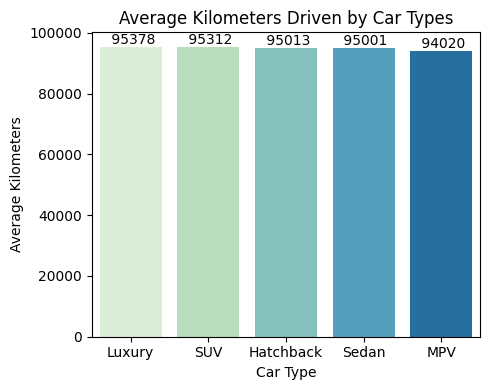

In [29]:
plt.figure(figsize = (5,4))
sns.barplot(x = 'Car Type', y = 'Kilometers', data = Avg_km_by_car_type,  palette = 'GnBu')
plt.ylabel('Average Kilometers')
plt.title('Average Kilometers Driven by Car Types')
for x,y in zip(Avg_km_by_car_type['Car Type'],Avg_km_by_car_type['Kilometers']):
    plt.text(x , y , f"{y : .0f}", ha = 'center', va = 'bottom')
plt.tight_layout()

#### Observation :
Luxury Car Type is Average Highest Kilometer Driven Which is 95378 Km

### Cars Varients With Highest & Lowest Average Kilometers Driven

In [30]:
Car_Varient = df.groupby('Model Variant')['Kilometers'].mean().sort_values(ascending = False).reset_index()

In [31]:
# Top 5 Model Variants with the highest average Kilometers driven:
Top_5 = Car_Varient.head()
Top_5

,Model Variant,Kilometers
0,M Sport,100457.761494
1,L&K,98379.963415
2,Luxury Line,98367.633523
3,Portfolio,98348.764977
4,GTX,98237.057239


In [32]:
# Bottom 5 Model Variants with the Lowest average Kilometers driven:
Bottom_5 = Car_Varient.tail()
Bottom_5

,Model Variant,Kilometers
77,HSE,89455.163121
78,HTK,89072.693750
79,Sharp,88928.794020
80,Monte Carlo,88112.479100
81,Active,88059.254181


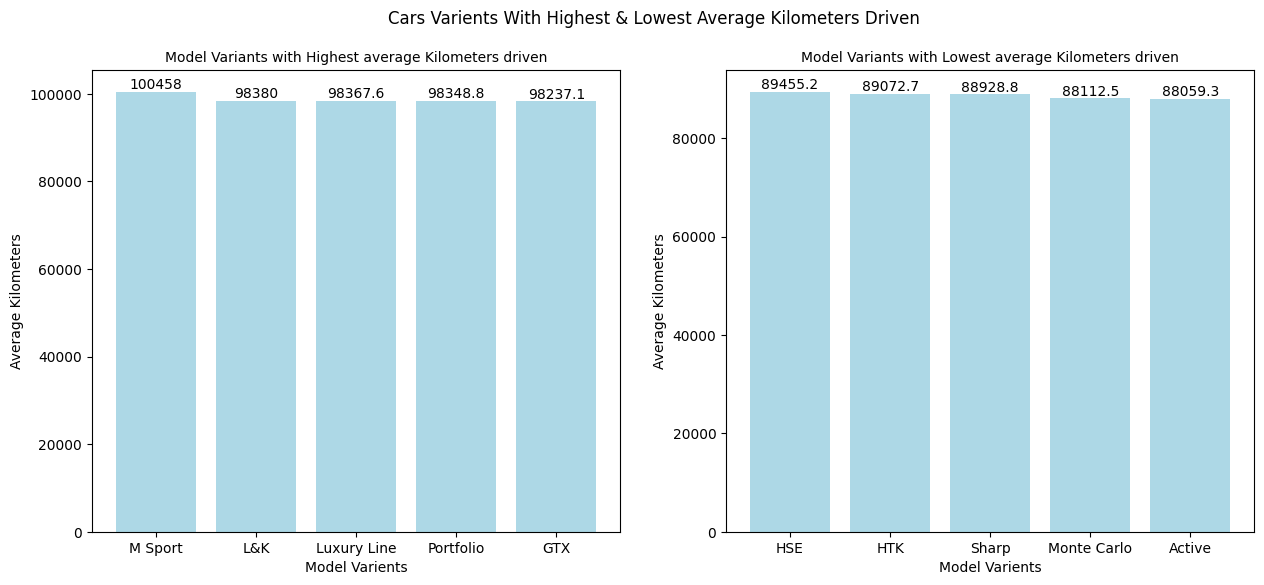

In [33]:
plt.figure(figsize = (15,6))

# Plot-1
plt.subplot(1,2,1)
ax = plt.bar(Top_5['Model Variant'],Top_5['Kilometers'], color = 'lightblue')
plt.xlabel('Model Varients')
plt.ylabel('Average Kilometers')
plt.title('Model Variants with Highest average Kilometers driven', fontsize = 10)
plt.bar_label(ax)

# Plot-2
plt.subplot(1,2,2)
ax = plt.bar(Bottom_5['Model Variant'],Bottom_5['Kilometers'], color = 'lightblue')
plt.xlabel('Model Varients')
plt.ylabel('Average Kilometers')
plt.title('Model Variants with Lowest average Kilometers driven', fontsize = 10)
plt.bar_label(ax)

plt.suptitle('Cars Varients With Highest & Lowest Average Kilometers Driven', fontsize = 12)

plt.show()

#### Observation :

1. Model Variants with the highest average Kilometers driven is M Sport with 98379.96 Km

2. Model Variants with the Lowest average Kilometers driven is HSE with 89455.16 Km

### Common Fuel Type for SUV Vs. Hatchback

In [34]:
# Filter Data For SUV
filter_SUV = df[df['Car Type'] == 'SUV']

# Filter Data For Hatchback
filter_Hatchback = df[df['Car Type'] == 'Hatchback']

# Find the most common Fuel Type for SUVs
common_fuel_type_suv = filter_SUV['Fuel Type'].mode()[0] if not filter_SUV['Fuel Type'].mode().empty else 'N/A'

# Find the most common Fuel Type for Hatchbacks
common_fuel_type_hatchback = filter_Hatchback['Fuel Type'].mode()[0] if not filter_Hatchback['Fuel Type'].mode().empty else 'N/A'

print("Observation")
print(f"Most common Fuel Type for SUVs is : {common_fuel_type_suv}")
print(f"Most common Fuel Type for Hatchback is : {common_fuel_type_hatchback}")

Observation
Most common Fuel Type for SUVs is : Petrol
Most common Fuel Type for Hatchback is : Petrol


## Geographical Analysis

### Average Price of Cars by States

In [35]:
Avg_price_by_state = df.groupby('State')['Price'].mean().sort_values(ascending = False).reset_index().rename(columns = {'Price' : 'Average Price ($)'})
top_5 = Avg_price_by_state.head()
top_5

,State,Average Price ($)
0,Telangana,799006.660935
1,Maharashtra,791015.589160
2,West Bengal,790334.373353
3,Gujarat,787396.862701
4,Karnataka,787278.409831


C:\Users\vtc\AppData\Local\Temp\ipykernel_716\311124845.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x = 'State', y = 'Average Price ($)', data = top_5, palette = 'viridis')


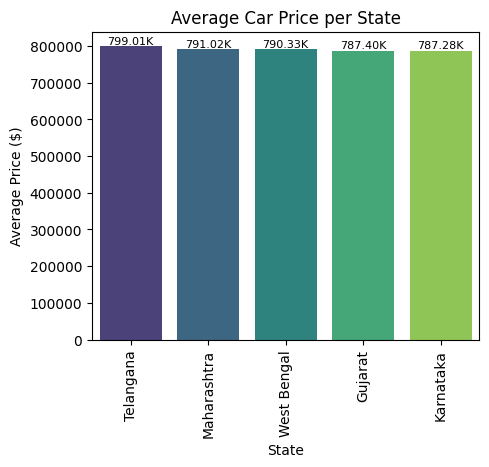

In [36]:
plt.figure(figsize = (5,4))
sns.barplot(x = 'State', y = 'Average Price ($)', data = top_5, palette = 'viridis')
plt.xticks(rotation = 90)
plt.title('Average Car Price per State')

for i, y in enumerate(top_5['Average Price ($)']):
    plt.text(i, y, f"{y / 1000:.2f}K", ha='center', va='bottom', fontsize=8)

plt.show()

#### Observation:

Talangana has Highest Average ar Price 799,006.66 $

### Correlation Between States & Fuel Type

In [37]:
contingency_table = pd.crosstab(df['State'], df['Fuel Type'])
contingency_table.head()
contingency_table_normalized = contingency_table.div(contingency_table.sum(axis=1), axis=0)

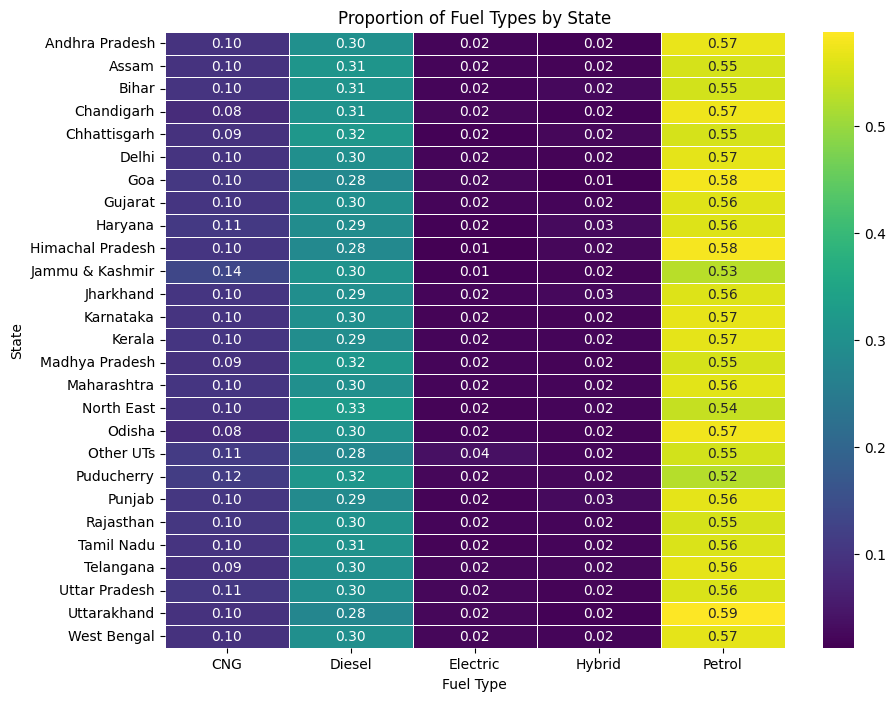

In [38]:
plt.figure(figsize=(10, 8))
sns.heatmap(contingency_table_normalized, annot=True, cmap='viridis', fmt=".2f", linewidths=.5)
plt.title('Proportion of Fuel Types by State')
plt.show()

#### Observation: 

1. Almost all states the petro & diesel are most common fuel types. Petrol Holds largest proportion, offen exceeding 50% in many states, followed by diesel which typically holds 30% of fuel types. which shows this fuel types are primary choice for cars owners in india.
2. While less dominant then petrol & diesel, CNG Shows notable presence in certain states. For instance, Delhi and Gujarat show a relatively higher proportion of CNG vehicles compared to other states, suggesting a stronger adoption of CNG infrastructure and potentially favorable policies or consumer preferences in these regions.
3. Emerging Electric and Hybrid Markets: Electric and Hybrid vehicles currently represent a much smaller proportion of the market share across all states (generally 1-4%). This indicates that these alternative fuel types are still in their nascent stages of adoption, though some states might show slightly higher proportions due to factors like awareness, charging infrastructure, or government incentives. There isn't a state that stands out significantly with an overwhelmingly higher proportion of electric or hybrid vehicles compared to others.
4. Overall Consistency with Minor Variations: While there are minor fluctuations in proportions, the overall pattern (Petrol and Diesel as dominant, followed by CNG, then Electric and Hybrid) remains largely consistent across most states. There isn't a strong "correlation" in the sense of one state exclusively using a particular fuel type and another exclusively using a different one. Instead, it's more about varying degrees of preference or availability within the broader dominance of Petrol and Diesel.